In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
# create the path for the file

myPath = os.path.join('/Users', 'Bryan', 'Documents', 'Programming', 'time_series_forecasting_with_python', 'UDEMY_TSA_FINAL', 'Data')

print(myPath)

os.chdir(myPath)

/Users/Bryan/Documents/Programming/time_series_forecasting_with_python/UDEMY_TSA_FINAL/Data


In [3]:
df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


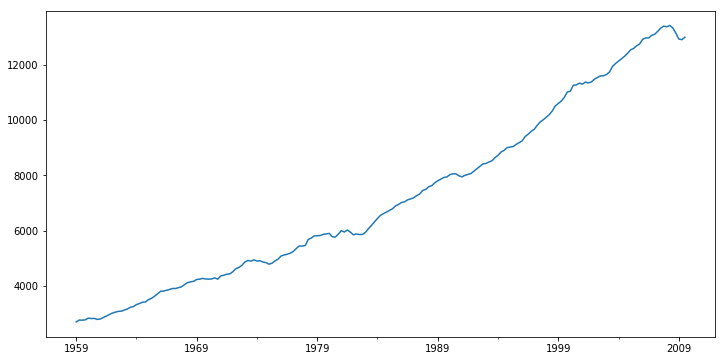

In [5]:
df['realgdp'].plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [8]:
type(gdp_trend)

pandas.core.series.Series

In [10]:
df['trend'] = gdp_trend

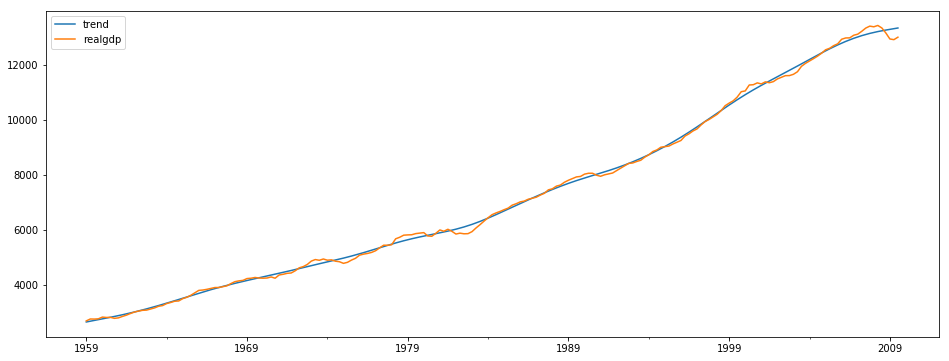

In [14]:
df[['trend', 'realgdp']].plot(figsize=(16,6))

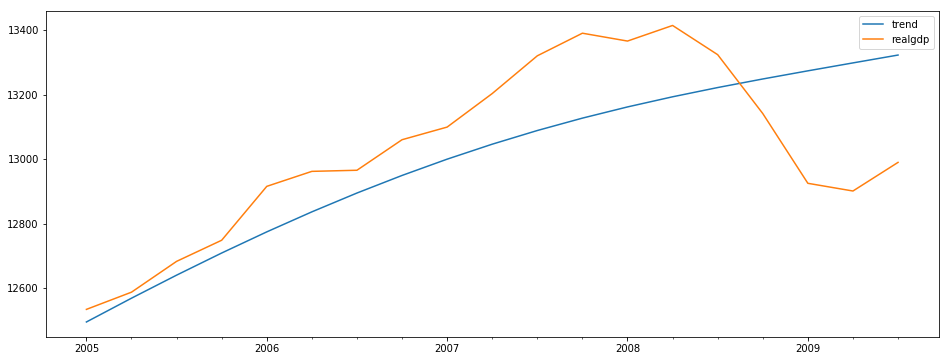

In [15]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(16,6))

In [47]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [48]:
airline.dropna(inplace=True)

airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


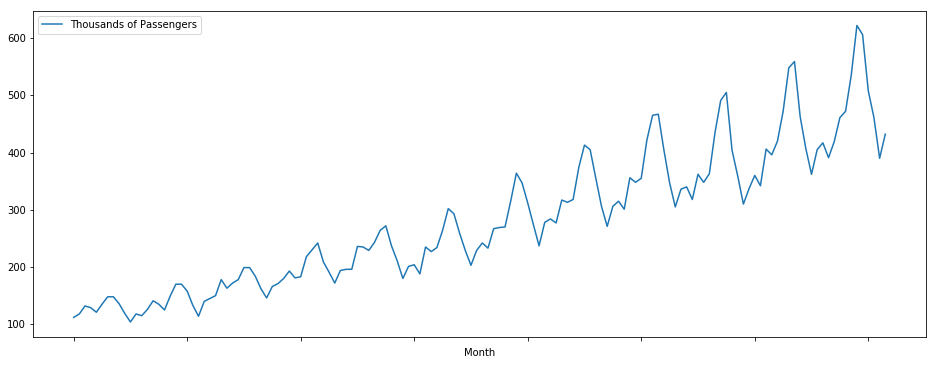

In [49]:
airline.plot(figsize=(16,6))

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,10


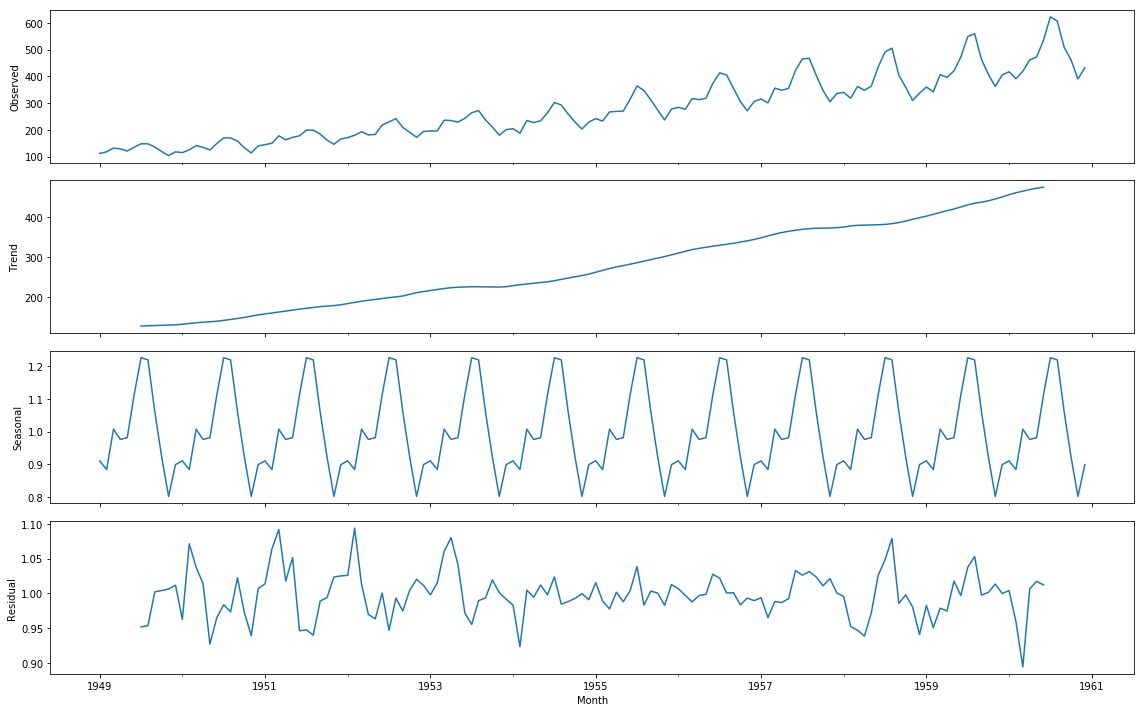

In [38]:
result.plot();


In [50]:
# reset the index
airline.index = pd.to_datetime(airline.index)

In [51]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [52]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [53]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

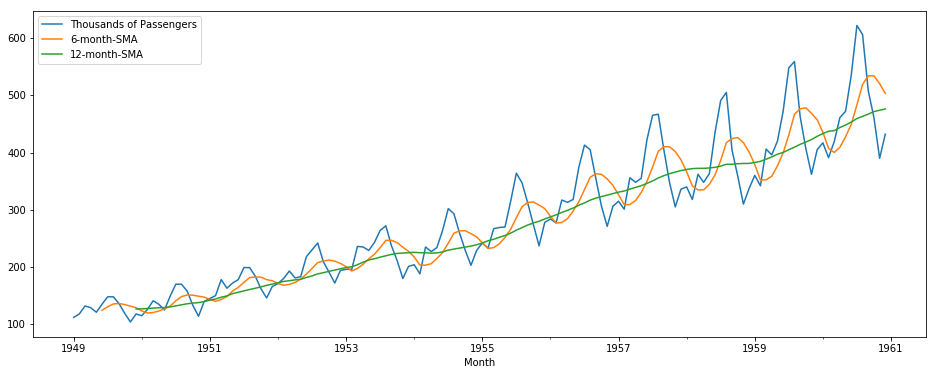

In [54]:
airline.plot(figsize=(16,6))

In [55]:
# exponentially weighted moving average
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

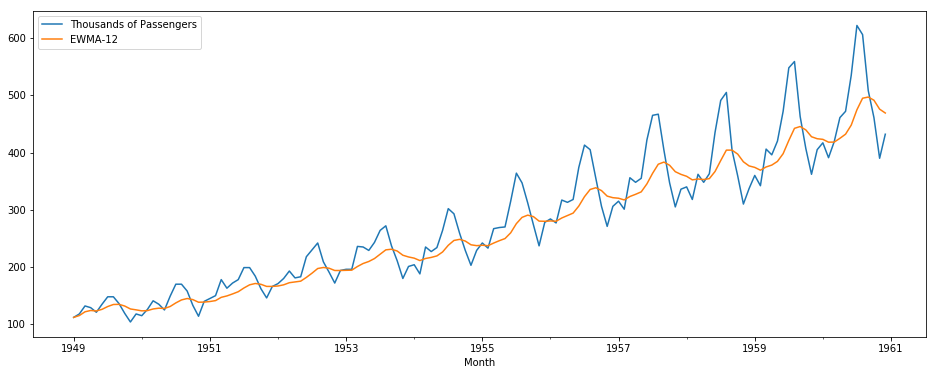

In [58]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize = (16,6))